In [1]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import  input_data

In [3]:
x = tf.placeholder(tf.float32, name="x", shape=[None, 784])
w = tf.Variable(tf.random_uniform([784, 10], -1, 1), name="w")
b = tf.Variable(tf.zeros([10]), name="biases")
output =  tf.matmul(x,w) + b

mnist = input_data.read_data_sets("data", one_hot=True)
minibatch_x, minibatch_y = mnist.train.next_batch(4)
print(minibatch_x )
print(minibatch_y)

init_op = tf.global_variables_initializer()
sess  = tf.Session()

sess.run(init_op)

feed_dict = {x: minibatch_x}
sess.run(output, feed_dict=feed_dict)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


array([[ 1.079139  ,  5.7234764 ,  0.47521782, -9.186285  , -0.36322832,
         5.2313895 ,  7.1203327 ,  4.850414  ,  2.536315  ,  3.9623058 ],
       [-2.685024  , 10.745924  , -3.949914  , -5.153036  ,  4.1643906 ,
         0.2389853 , -1.7724557 ,  7.654727  ,  3.5088599 ,  0.43229783],
       [ 0.38494152,  6.460862  ,  4.676771  , -2.8766217 , -1.9549448 ,
         0.44322968,  0.17970467, 12.57156   , -2.155406  ,  7.0300074 ],
       [-5.8340883 ,  7.329014  , -2.8145542 , -3.8877227 , -6.3063374 ,
        -0.7204013 ,  8.092449  ,  2.3315437 , 10.912688  ,  8.383444  ]],
      dtype=float32)

In [2]:
import tensorflow  as tf
import cv2
from sklearn import cross_validation
import numpy as np 
import pandas as pd

/Users/masaaki/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/masaaki/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
with open("path_and_label1.txt", "r") as f: 
    train_path_list = f.readlines()


filenames = []
labels = []
for i, row in enumerate(train_path_list):
    row=row.split(" ")
    filenames.append(row[0])
    labels.append(row[1])

label = []
for i in labels:
    label.append(int(i))

train_data, test_data, train_target, test_target = cross_validation.train_test_split(filenames,label, test_size=0.3, random_state=0)


In [10]:
# Reads an image from a file. decodes it into a dense tensor, and resizes it to a fixed shape.
def _parse_function(filename, label):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string,channels=3)
    image_resized = tf.image.resize_images(image_decoded, [250, 250])
    return image_resized,  label 

# A vector of filenames.
train_filenames = tf.constant(train_data) 
test_filenames = tf.constant(test_data)
# labels[i] is the label for the image in filenames[i]
train_labels =  tf.constant(train_target)
test_labels = tf.constant(test_target)

train_dataset = tf.data.Dataset.from_tensor_slices((train_filenames, train_labels)) 
test_dataset = tf.data.Dataset.from_tensor_slices((test_filenames,test_labels)) 

train_dataset = train_dataset.map(_parse_function)#.batch(4)
test_dataset = test_dataset.map(_parse_function)#.batch(4)

iterator = tf.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)


train_next_element,t  = iterator.get_next()
test_next_element, t2 = iterator.get_next() 

training_init_op = iterator.make_initializer(train_dataset)
test_init_op = iterator.make_initializer(test_dataset)

sess = tf.InteractiveSession()
sess.run(training_init_op)
sess.run(test_init_op)

for i in range(10):
    sess.run(train_next_element.eval())
sess.close()



TypeError: Fetch argument array([[[232.     , 229.     , 222.     ],
        [226.     , 226.     , 218.     ],
        [226.2    , 226.6    , 218.6    ],
        ...,
        [220.40039, 213.40039, 194.40039],
        [228.     , 220.     , 200.19995],
        [222.79956, 213.39978, 188.1997 ]],

       [[198.4    , 195.     , 186.     ],
        [196.51999, 194.96   , 185.48   ],
        [201.04001, 200.32   , 190.56   ],
        ...,
        [228.99991, 224.99991, 199.99991],
        [219.31995, 211.95996, 187.03992],
        [207.67996, 198.27982, 169.47989]],

       [[219.     , 215.     , 206.     ],
        [214.76   , 211.4    , 202.4    ],
        [210.68   , 207.68   , 198.68   ],
        ...,
        [219.2002 , 213.2002 , 188.40039],
        [214.43991, 207.43991, 181.43991],
        [198.23979, 189.23979, 160.23979]],

       ...,

       [[177.00024, 177.00024, 175.00024],
        [193.08032, 193.08032, 193.08032],
        [195.16049, 195.16049, 197.16049],
        ...,
        [169.07996, 171.07996, 168.07996],
        [156.91989, 158.91989, 155.91989],
        [193.96162, 195.96162, 192.96162]],

       [[203.19934, 204.59949, 199.19934],
        [199.63972, 200.03987, 197.8398 ],
        [200.07922, 200.39934, 200.43935],
        ...,
        [177.59912, 179.59912, 174.59912],
        [177.75967, 179.75967, 174.75967],
        [187.39978, 189.39978, 184.39978]],

       [[192.19995, 195.99988, 191.59985],
        [181.56013, 183.56013, 181.76009],
        [175.04008, 176.04008, 178.04008],
        ...,
        [166.60059, 171.60059, 167.60059],
        [168.92009, 173.92009, 169.92009],
        [174.00012, 179.00012, 175.00012]]], dtype=float32) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)

In [69]:
my_array =  np.array([[1.,3.,3.,7.,9.],
                                       [-2.,0.,2.,4.,6.],
                                       [-6.,-3.,0.,3.,6.]])
x_vals = np.array([my_array, my_array+1])
x_data = tf.placeholder(tf.float32, shape=(3, 5))

In [70]:
m1 = tf.constant([[1.],[0.],[-1.],[2.],[4.]])
m2 = tf.constant([[2.]])
a1 = tf.constant([[10.]])

prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

with tf.Session() as  sess:
    for x_bal in x_vals:
        print(sess.run(add1, feed_dict={x_data: x_bal}))
    
    

[[106.]
 [ 66.]
 [ 58.]]
[[118.]
 [ 78.]
 [ 70.]]


In [71]:
import os 
import io
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [72]:
sess = tf.Session()

In [73]:
summary_writer = tf.summary.FileWriter('tensorboard', tf.get_default_graph())
if not os.path.exists('tensorboard'):
    os.makedirs('tensorboard')

time.sleep(5)

batch_size = 50
generations = 100

x_data = np.arange(1000)/10.
true_slope=2.
y_data = x_data*true_slope+np.random.normal(loc=0.0, scale=25,size=1000)

In [74]:
np.random.normal(loc=0.0,scale=25,size=1000)

array([-9.28424395e+00,  1.00240192e+01, -3.56817960e+00, -7.16682275e+00,
       -1.77427650e+01,  3.65429978e+00,  1.21468694e+01,  4.41627188e+01,
       -1.58038393e+01,  5.58666400e+00, -4.93975286e+01,  4.87043612e+01,
       -2.57573586e+01,  2.27740461e+01,  1.35009168e+01, -1.39594132e+01,
        6.70236482e+00,  4.21994765e+01,  1.52139625e+01, -7.94275437e+00,
        2.97526147e+01, -2.40131405e+01,  9.53217387e+00,  3.28560062e+01,
        7.47810773e+00, -9.87368078e+00,  2.42244944e+01, -4.12775682e+00,
        4.64848812e+01,  1.81745132e+01, -1.71931473e+01, -2.19908318e+01,
       -3.33954604e+01,  1.97223656e+01,  6.41291138e+00, -3.97471304e+01,
        3.69812316e+01, -7.29555410e+00,  2.30155670e+01, -1.18355433e+01,
       -4.22949276e+01,  8.12535262e+00, -6.14503953e+00,  8.14086856e+00,
        1.31345211e+01,  8.28258865e+00,  1.17034157e+01, -6.56803037e-01,
        9.35755259e-01, -1.75053313e+00, -2.26008357e+01,  4.37525513e+01,
        4.93937622e+00, -

In [75]:
plt.scatter(x_data, np.random.normal(0.0,25,1000))

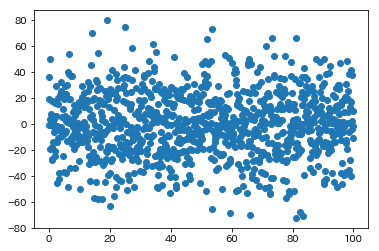

In [76]:
plt.show()

In [77]:
w = tf.Variable(tf.zeros([784, 10]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(w))
sess.close()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [78]:
from sklearn.linear_model import LogisticRegression

In [83]:
batch = mnist.train.next_batch(10)

In [84]:
batch[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
batch[1]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

/Users/masaaki/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


             label             x             y
0    cloudy_seesaa -20323.681641   -945.262878
1    cloudy_seesaa  11658.305664  16328.167969
2    cloudy_seesaa  11042.580078  18074.951172
3    cloudy_seesaa  -8694.732422  -8193.077148
4    cloudy_seesaa -12631.281250   9601.000000
5     sunny_seesaa  13079.349609  -7253.146973
6    cloudy_seesaa -21394.634766   4084.536377
7    cloudy_seesaa  -7180.675781  -3967.806885
8    cloudy_seesaa -21595.324219    538.770325
9    cloudy_seesaa    -91.086502  -7364.481934
10   cloudy_seesaa  -6698.694336  -2702.273193
11    sunny_seesaa  20118.638672  -6542.117676
12   cloudy_seesaa  15191.707031   5116.452637
13   cloudy_seesaa -10142.708984 -10513.056641
14    sunny_seesaa  21687.644531  -7563.688477
15   cloudy_seesaa -11118.933594   8500.883789
16   cloudy_seesaa  11346.471680  16041.923828
17   cloudy_seesaa -21888.027344    928.631653
18   cloudy_seesaa -10734.908203 -11325.541992
19   cloudy_seesaa -10842.799805   2250.300537
20    sunny_s

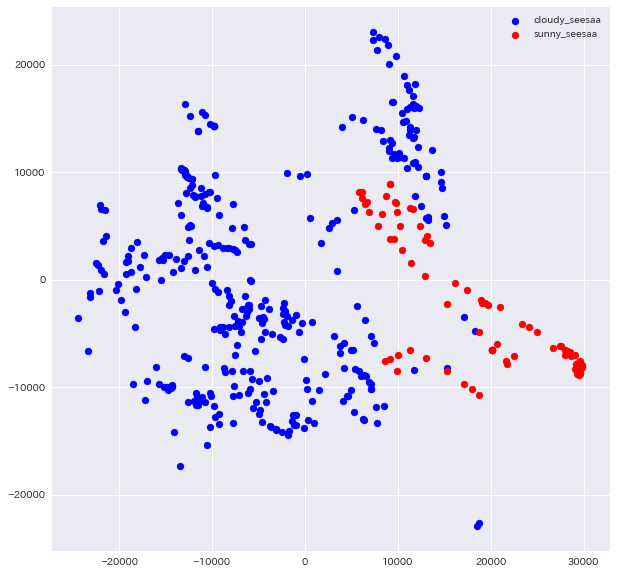

/Users/masaaki/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Predicted   0   1
Actual           
0          24   0
1          29  93


In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.decomposition import RandomizedPCA
from sklearn.externals import joblib
from sklearn.svm import LinearSVC


STANDARD_SIZE = (300,250)#(300, 167)

#画像をパース
def img_to_matrix(filename, verbose=False):
    img = Image.open(filename)
    if verbose:
        print ('changing size from %s to %s' % (str(img.size), str(STANDARD_SIZE)))
    img = img.resize(STANDARD_SIZE)
    imgArray = np.asarray(img)
    return imgArray  # imgArray.shape = (167 x 300 x 3)

#1次元に引き延ばす
def flatten_image(img):
    s = img.shape[0] * img.shape[1] * img.shape[2]
    img_wide = img.reshape(1, s)
    return img_wide[0]

def main():
    images = train_data
    labels = train_target
    ls = []

    for i in labels:
        if i == 1:
            ls.append("cloudy_seesaa")
        elif i == 0:
            ls.append("sunny_seesaa")
    labels = ls
        
    data = []
    for image in images:
        img = img_to_matrix(image)
        img = flatten_image(img)
        data.append(img)

    data = np.array(data)

    is_train = np.random.uniform(0, 1, len(data)) <= 0.7
    y = np.where(np.array(labels) == 'cloudy_seesaa', 1, 0) 

    train_x, train_y = data[is_train], y[is_train]

    # plot in 2 dimensions
    pca = RandomizedPCA(n_components=2)
    X = pca.fit_transform(data)
    df = pd.DataFrame({"x": X[:, 0], "y": X[:, 1],
                       "label": np.where(y == 1, 'cloudy_seesaa', 'sunny_seesaa')})
    colors = ['blue', 'red']
    print(df)
    plt.figure(figsize=(10,10))
    for label, color in zip(df['label'].unique(), colors):
        mask = df['label'] == label
        plt.scatter(df[mask]['x'], df[mask]['y'], c=color, label=label)
    sns.set() 

    plt.legend()
    plt.show()
    #plt.savefig('pca_feature1.png')

    # training a classifier
    pca = RandomizedPCA(n_components=5)
    train_x = pca.fit_transform(train_x)

    svm = LinearSVC(C=1.0)
    svm.fit(train_x, train_y)
    joblib.dump(svm, 'model.pkl')
    # evaluating the model
    test_x, test_y = data[is_train == False], y[is_train == False]
    test_x = pca.transform(test_x)
    print (pd.crosstab(test_y, svm.predict(test_x),
                      rownames=['Actual'], colnames=['Predicted']))

if __name__ == '__main__':
    main()


In [5]:
img = Image.open(train_data[0])

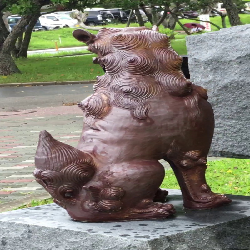

In [8]:
img.resize((250,250))

In [ ]:
img2 = Image.open()